In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Analysis of the spin polarization

We consider the analysis of the spin polarization based on the post processing of the .spin_magnetization output
of the real time calculation. 

## k = Gamma - no commutator - pulse width 40 fs

In [26]:
data_dir = 'rt_gamma_no-com/FixSymm'
last_time = '240.000'

In [27]:
# circular polarization spanning a given frequencies range
freq = 1.55
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

In [32]:
mgn_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.spin_magnetization'%(freq,freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_linear/o-freq_%s-pol_linear.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('linear pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('linear pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_reversed_circular/o-freq_%s-pol_reversed_circular.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('rev circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('rev circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)

circular pol conduction mgn 49.62381423011008 49.62381423
circular pol valence mgn 82.79241323003154 -82.79241323

linear pol conduction mgn 3.439430152997861e-05 -1.810909822e-05
linear pol valence mgn 9.717813870045586e-05 8.077631719e-05

rev circular pol conduction mgn 49.62382020008809 -49.623820200000004
rev circular pol valence mgn 82.79269340008443 82.79269339999999


Perform spin polarization analysis using ypp

In [6]:
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(freq,freq)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(freq,freq)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(freq,freq)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

In [7]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

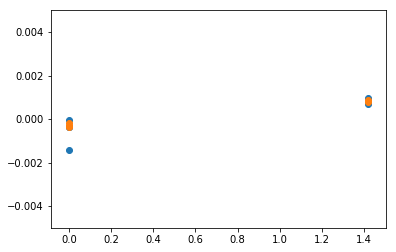

In [8]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

See how the spin polarization emerges at E=1.418

In [9]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[0, 1, 2, 3] [4, 5]


In [10]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [11]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
print(spin_pol_cond)

Total carriers 0.0033493999999999998
0.5851794351227099


Due to the degeneracy the spin polarization computed in this way is wrong.

## k = Gamma and close - no commutator - pulse width 40 fs

In [33]:
data_dir = 'rt_gamma-and-close_no-com/FixSymm'
last_time = '240.000'

In [34]:
# circular polarization spanning a given frequencies range
freq = 1.55
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

In [35]:
mgn_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.spin_magnetization'%(freq,freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_linear/o-freq_%s-pol_linear.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('linear pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('linear pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)
print('')

mgn_file = data_dir+'/freq_%s-pol_reversed_circular/o-freq_%s-pol_reversed_circular.spin_magnetization'%(lin_freq,lin_freq)
mgn = C.dict_parser(mgn_file)
final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
print('rev circular pol conduction mgn',np.linalg.norm(final_mgn)*100,mgn['Mc_z'][-1]*100)
final_mgn = np.array([mgn['Mv_x'][-1],mgn['Mv_y'][-1],mgn['Mv_z'][-1]])
print('rev circular pol valence mgn',np.linalg.norm(final_mgn)*100,mgn['Mv_z'][-1]*100)

circular pol conduction mgn 49.54552050021642 49.5455205
circular pol valence mgn 78.2832086000367 -78.2832086

linear pol conduction mgn 7.054417442210872e-05 -3.04228536e-05
linear pol valence mgn 2.8428794655969838e-05 1.33380709e-05

rev circular pol conduction mgn 49.54540730004109 -49.5454073
rev circular pol valence mgn 78.28317880001035 78.2831788


Perform spin polarization analysis using ypp

In [19]:
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(freq,freq)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(freq,freq)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(freq,freq)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

In [20]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

(-0.005, 0.005)

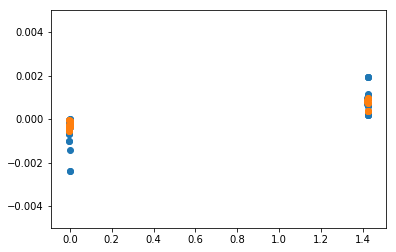

In [21]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)
plt.ylim((-0.005,0.005))

In this case we have two possible channels with energies 1.418 and 1.422

In [22]:
val_indexes = []
cond_indexes = []

for ind,e in enumerate(energies):
    if e == 0.0:
        val_indexes.append(ind)

for ind,e in enumerate(energies):
    if e == 1.418 or e == 1.422:
        cond_indexes.append(ind)

print(val_indexes,cond_indexes)

[24, 25, 26, 27] [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


In [23]:
val_up  = [carriers_up[i] for i in val_indexes]
val_dn  = [carriers_dn[i] for i in val_indexes]
cond_up  = [carriers_up[i] for i in cond_indexes]
cond_dn  = [carriers_dn[i] for i in cond_indexes]

In [24]:
sum_cond_up = sum(cond_up)
sum_cond_dn = sum(cond_dn)
print('Total carriers',sum_cond_up+sum_cond_dn)
spin_pol_cond = (sum_cond_up-sum_cond_dn)/(sum_cond_up+sum_cond_dn)*100
print(spin_pol_cond)

Total carriers 0.023642
14.153624904830375


## k = 100 random (k range of 0.1 centred in Gamma) - no commutator - pulse width 100 fs

In [5]:
data_dir = 'rt_k100random_width100_no-com/FixSymm'
last_time = '600.000'

In [6]:
# circular polarization spanning a given frequencies range
freq_range = [1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

In [7]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/freq_%s-pol_circular/o-freq_%s-pol_circular.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

In [8]:
cond_pol = []
val_pol = []
tot_cond = []
for mgn,car in zip(magnetizations,carriers):
    #final_mgn = np.array([mgn['Mc_x'][-1],mgn['Mc_y'][-1],mgn['Mc_z'][-1]])
    cond_pol.append(100.*mgn['Mc_z'][-1])
    val_pol.append(100.*mgn['Mv_z'][-1])
    #spin_pol.append(100*np.linalg.norm(final_mgn))
    tot_cond.append(car['dN_elec'][-1])

In [9]:
print(tot_cond)
print(cond_pol)
print(val_pol)

[0.000371618458, 0.0007013920113, 0.001534310053, 0.002558642067, 0.003017660929, 0.002724160673, 0.001960246358]
[30.944895700000004, 34.016785, 36.2955213, 32.9640299, 24.2076844, 14.50175643, 9.82553884]
[-42.0297742, -43.9233571, -45.3017563, -44.384056300000005, -40.935817400000005, -36.88586056, -31.5013647]


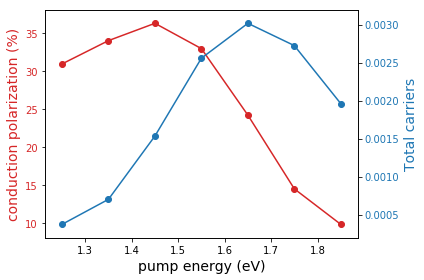

In [10]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('conduction polarization (%)', color=color,size=14)
ax1.plot(freq_range, cond_pol, color=color)
ax1.scatter(freq_range, cond_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

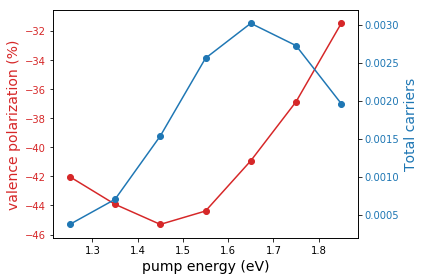

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('valence polarization (%)', color=color,size=14)
ax1.plot(freq_range, val_pol, color=color)
ax1.scatter(freq_range, val_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## k = 150 random (k range of 0.13 centred in Gamma, with gaps up to 2 eV) - no commutator - pulse width 100 fs

In [59]:
data_dir = 'rt_k150random_no-com/FixSymm'
last_time = '600.000'
mgn_time = 50

In [60]:
# circular polarization spanning a given frequencies range
freq_range = [1.2,1.3,1.35,1.4,1.45,1.5,1.6,1.7,1.8,1.9,2.0,2.1]

In [61]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/Int_1000-dephase_0.002-freq_%s/o-Int_1000-dephase_0.002-freq_%s.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/Int_1000-dephase_0.002-freq_%s/o-Int_1000-dephase_0.002-freq_%s.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

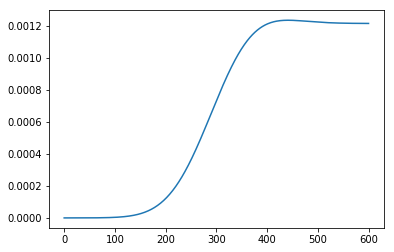

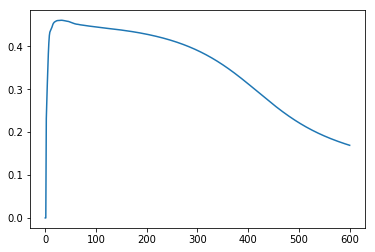

In [62]:
freq_int = 5
plt.plot(carriers[freq_int]['time'],carriers[freq_int]['dN_elec'])
plt.show()
plt.plot(magnetizations[freq_int]['T'],magnetizations[freq_int]['Mc_z'])

In [63]:
cond_pol = []
val_pol = []
tot_cond = []
for mgn,car in zip(magnetizations,carriers):
    cond_pol.append(100.*mgn['Mc_z'][mgn_time])
    val_pol.append(100.*mgn['Mv_z'][mgn_time])
    tot_cond.append(car['dN_elec'][-1])

In [64]:
print(tot_cond)
print(cond_pol)
print(val_pol)

[1.02367403e-05, 2.29045454e-05, 4.68774997e-05, 0.0002516912064, 0.002824148862, 0.001215660828, 0.001752848155, 0.001798923244, 0.002200718503, 0.002041854663, 0.00111346156, 0.0009065483464]
[38.5870129, 43.1738377, 44.6402848, 48.1806874, 48.0092645, 45.5641299, 40.9832358, 35.825404500000005, 34.047091, 23.1098443, -3.77266183, -26.342397899999998]
[-59.791445700000004, -67.3823893, -68.9249992, -75.2419174, -73.67003559999999, -61.9131327, -47.517526100000005, -41.0983801, -38.2144272, -27.284213899999997, -3.30020711, 16.2511513]


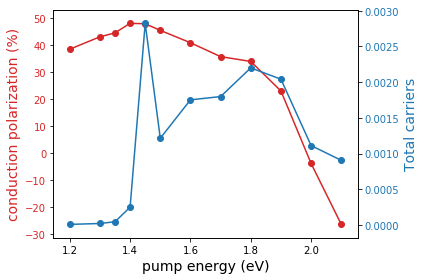

In [65]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('conduction polarization (%)', color=color,size=14)
ax1.plot(freq_range, cond_pol, color=color)
ax1.scatter(freq_range, cond_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

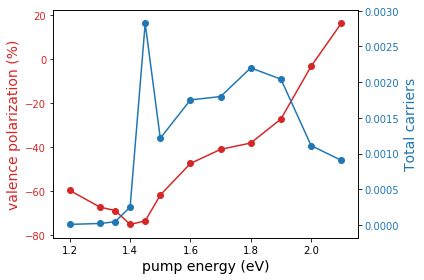

In [66]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('valence polarization (%)', color=color,size=14)
ax1.plot(freq_range, val_pol, color=color)
ax1.scatter(freq_range, val_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## k = 2000 random (k range of 0.13 centred in Gamma, with gaps up to 2 eV) - no commutator - pulse width 100 fs

In [14]:
data_dir = 'rt_k200random_no-com/FixSymm'
last_time = '600.000'
mgn_time = 50

In [15]:
# circular polarization spanning a given frequencies range
freq_range = [1.2,1.3,1.35,1.4,1.45,1.5,1.6,1.7,1.8,1.9,2.0,2.1]

In [16]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/Int_1000-dephase_0.002-freq_%s/o-Int_1000-dephase_0.002-freq_%s.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/Int_1000-dephase_0.002-freq_%s/o-Int_1000-dephase_0.002-freq_%s.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

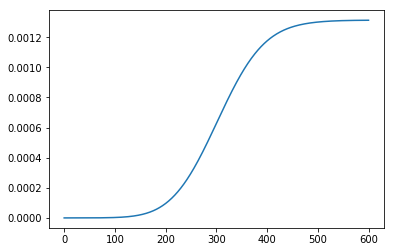

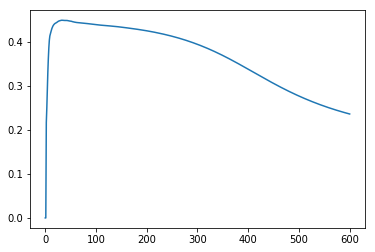

In [17]:
freq_int = 5
plt.plot(carriers[freq_int]['time'],carriers[freq_int]['dN_elec'])
plt.show()
plt.plot(magnetizations[freq_int]['T'],magnetizations[freq_int]['Mc_z'])

In [18]:
cond_pol = []
val_pol = []
tot_cond = []
for mgn,car in zip(magnetizations,carriers):
    cond_pol.append(100.*mgn['Mc_z'][mgn_time])
    val_pol.append(100.*mgn['Mv_z'][mgn_time])
    tot_cond.append(car['dN_elec'][-1])

In [19]:
print(tot_cond)
print(cond_pol)
print(val_pol)

[7.47283366e-06, 1.42463523e-05, 2.45732062e-05, 9.00425002e-05, 0.0007909776759, 0.001312596607, 0.001778059988, 0.001226755907, 0.002314336598, 0.002140396507, 0.00172306399, 0.000649108144]
[34.2838675, 38.837522299999996, 40.544787, 46.0173935, 46.293366000000006, 44.7217196, 40.6859219, 36.7072552, 29.270026100000003, 20.39389461, 0.7080126087999999, -26.032021640000004]
[-52.5668979, -59.5378339, -61.3412321, -70.67695259999999, -68.4328616, -58.93448, -45.7206786, -41.4072156, -33.3927274, -24.94785488, -7.187266648, 15.93247205]


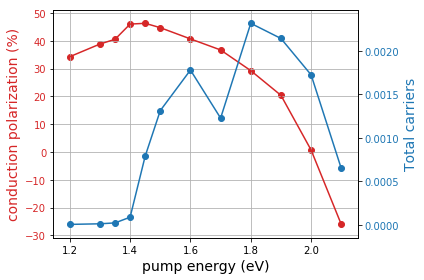

In [27]:
fig, ax1 = plt.subplots()
plt.grid(axis='both')
color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('conduction polarization (%)', color=color,size=14)
ax1.plot(freq_range, cond_pol, color=color)
ax1.scatter(freq_range, cond_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

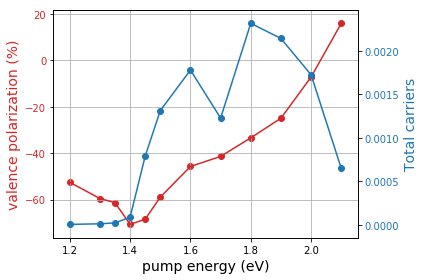

In [28]:
fig, ax1 = plt.subplots()
plt.grid(axis='both')
color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('valence polarization (%)', color=color,size=14)
ax1.plot(freq_range, val_pol, color=color)
ax1.scatter(freq_range, val_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## k = 2000 random (k range of 0.13 centred in Gamma, with gaps up to 2 eV) - no commutator - pulse width 100 fs. Including split-off bands

In [25]:
data_dir = 'rt_k200random_no-com/FixSymm'
last_time = '600.000'
mgn_time = 50

In [26]:
# circular polarization spanning a given frequencies range
freq_range = [1.2,1.3,1.35,1.4,1.45,1.5,1.6,1.7,1.8,1.9,2.0,2.1]

In [27]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-split-off_True/o-Int_1000-dephase_0.002-freq_%s-split-off_True.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-split-off_True/o-Int_1000-dephase_0.002-freq_%s-split-off_True.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

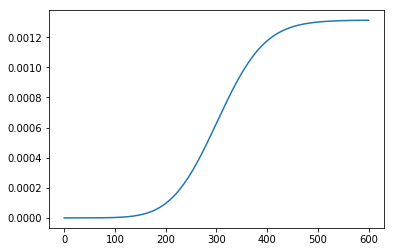

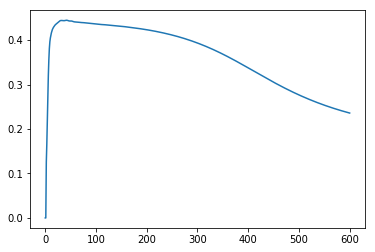

In [28]:
freq_int = 5
plt.plot(carriers[freq_int]['time'],carriers[freq_int]['dN_elec'])
plt.show()
plt.plot(magnetizations[freq_int]['T'],magnetizations[freq_int]['Mc_z'])

In [29]:
cond_pol = []
val_pol = []
tot_cond = []
for mgn,car in zip(magnetizations,carriers):
    cond_pol.append(100.*mgn['Mc_z'][mgn_time])
    val_pol.append(100.*mgn['Mv_z'][mgn_time])
    tot_cond.append(car['dN_elec'][-1])

In [30]:
print(tot_cond)
print(cond_pol)
print(val_pol)

[7.72101612e-06, 1.45675222e-05, 2.49453115e-05, 9.047961794e-05, 0.0007914931048, 0.00131321908, 0.00177919399, 0.001229684916, 0.00237051351, 0.002567300806, 0.001791468356, 0.0008915892686]
[30.6642741, 36.3711983, 38.379389, 45.2383399, 45.802140200000004, 44.285568600000005, 40.1708573, 35.6123269, 22.8255138, 8.401468396, -10.31237617, -40.14127254]
[-40.839991, -49.9838144, -52.539324799999996, -66.4316952, -66.2472904, -57.887804499999994, -45.6678241, -41.798910500000005, -31.1221659, -19.99223977, -2.847098373, 20.51064521]


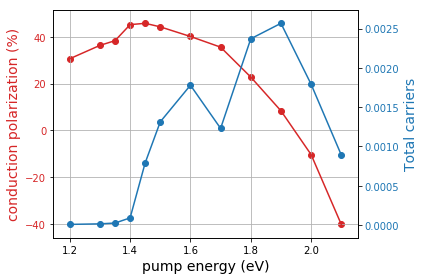

In [31]:
fig, ax1 = plt.subplots()
plt.grid(axis='both')
color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('conduction polarization (%)', color=color,size=14)
ax1.plot(freq_range, cond_pol, color=color)
ax1.scatter(freq_range, cond_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

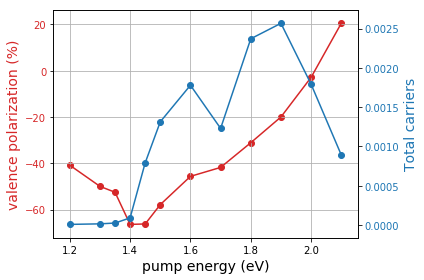

In [32]:
fig, ax1 = plt.subplots()
plt.grid(axis='both')
color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('valence polarization (%)', color=color,size=14)
ax1.plot(freq_range, val_pol, color=color)
ax1.scatter(freq_range, val_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## k = 2000 random (k range of 0.13 centred in Gamma, with gaps up to 2 eV) - no commutator - pulse width 100 fs. Including split-off bands and $\rho_{cv}$

In [2]:
data_dir = 'rt_k200random_no-com/FixSymm'
last_time = '600.000'
mgn_time = 50

In [3]:
# circular polarization spanning a given frequencies range
freq_range = [1.2,1.3,1.35,1.4,1.45,1.5,1.6,1.7,1.8,1.9,2.0,2.1]

In [5]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-rhocv_True/o-Int_1000-dephase_0.002-freq_%s-rhocv_True.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-rhocv_True/o-Int_1000-dephase_0.002-freq_%s-rhocv_True.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

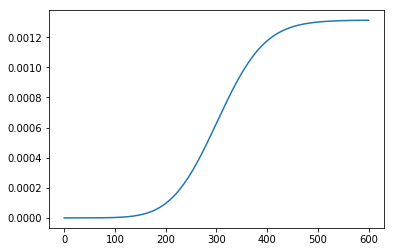

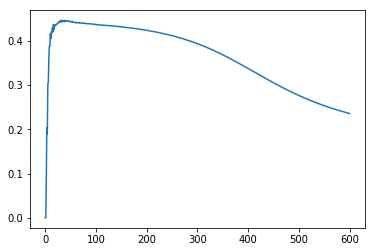

In [7]:
freq_int = 5
plt.plot(carriers[freq_int]['time'],carriers[freq_int]['dN_elec'])
plt.show()
plt.plot(magnetizations[freq_int]['T'],magnetizations[freq_int]['Mc_z'])

In [8]:
cond_pol = []
val_pol = []
tot_cond = []
for mgn,car in zip(magnetizations,carriers):
    cond_pol.append(100.*mgn['Mc_z'][mgn_time])
    val_pol.append(100.*mgn['Mv_z'][mgn_time])
    tot_cond.append(car['dN_elec'][-1])

In [9]:
print(tot_cond)
print(cond_pol)
print(val_pol)

[7.72101612e-06, 1.45675222e-05, 2.49453115e-05, 9.047961794e-05, 0.0007914931048, 0.00131321908, 0.00177919399, 0.001229684916, 0.00237051351, 0.002567300806, 0.001791468356, 0.0008915892686]
[31.820282300000002, 36.092129299999996, 38.5983169, 45.2899158, 45.9164053, 44.3470955, 40.1460588, 35.5925202, 22.5775272, 8.345685154, -10.00503451, -39.27398622]
[-39.684087, -50.2632141, -52.320283700000005, -66.38008359999999, -66.1331594, -57.8264058, -45.6926286, -41.8188542, -31.370165900000003, -20.04812658, -2.539755031, 21.37789577]


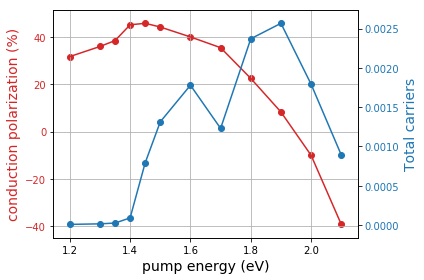

In [10]:
fig, ax1 = plt.subplots()
plt.grid(axis='both')
color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('conduction polarization (%)', color=color,size=14)
ax1.plot(freq_range, cond_pol, color=color)
ax1.scatter(freq_range, cond_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

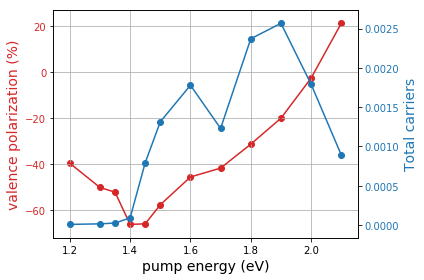

In [11]:
fig, ax1 = plt.subplots()
plt.grid(axis='both')
color = 'tab:red'
ax1.set_xlabel('pump energy (eV)',size=14)
ax1.set_ylabel('valence polarization (%)', color=color,size=14)
ax1.plot(freq_range, val_pol, color=color)
ax1.scatter(freq_range, val_pol, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total carriers', color=color,size=14)  # we already handled the x-label with ax1
ax2.plot(freq_range, tot_cond, color=color)
ax2.scatter(freq_range, tot_cond, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

We peform a detailed comparison w.r.t the case without rho_cv

In [14]:
magnetizations = []
carriers = []
for f in freq_range:
    mgn_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-split-off_True/o-Int_1000-dephase_0.002-freq_%s-split-off_True.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-split-off_True/o-Int_1000-dephase_0.002-freq_%s-split-off_True.carriers'%(f,f)
    magnetizations.append(C.dict_parser(mgn_file))
    carriers.append(C.dict_parser(carriers_file))

In [15]:
magnetizations_rhocv = []
carriers_rhocv = []
for f in freq_range:
    mgn_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-rhocv_True/o-Int_1000-dephase_0.002-freq_%s-rhocv_True.spin_magnetization'%(f,f)
    carriers_file = data_dir+'/Int_1000-dephase_0.002-freq_%s-rhocv_True/o-Int_1000-dephase_0.002-freq_%s-rhocv_True.carriers'%(f,f)
    magnetizations_rhocv.append(C.dict_parser(mgn_file))
    carriers_rhocv.append(C.dict_parser(carriers_file))

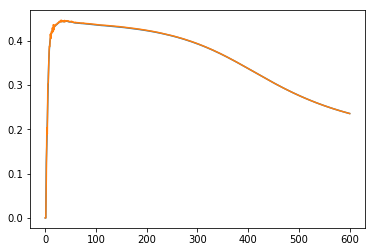

In [17]:
freq_int = 5
plt.plot(magnetizations[freq_int]['T'],magnetizations[freq_int]['Mc_z'])
plt.plot(magnetizations_rhocv[freq_int]['T'],magnetizations_rhocv[freq_int]['Mc_z'])

In [18]:
freq_int = 5
m = np.array(magnetizations[freq_int]['Mc_z'])
m_cv = np.array(magnetizations_rhocv[freq_int]['Mc_z'])
diffe = m - m_cv

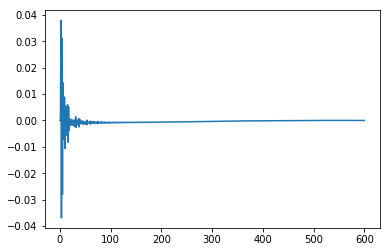

In [20]:
plt.plot(diffe)